# ASINA test set

### Importing libraries and define functions

In [2]:
import pandas as pd
import numpy as np
import scipy
import math
import os

In [3]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [4]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [6]:
from pycaret.regression import *

In [8]:
import functions as f

### Define dataset columns

In [9]:
df_columns = ['NP_type', 'Coating','core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g',
               'shape','Dose_microg_mL','Duration_h','Cell_name','Cell_species','cell_Organ','Cell_morphology',
               'Cell_age','cell_type','sex','Assay','Test_indicator','Viability']

### Loading the ASINA test data into the data frame.

In [10]:
tdf = pd.read_csv("input/test_set_asina.txt", sep="\t", encoding="unicode_escape", usecols=df_columns)

In [11]:
data_asina_test_df = f.canonicalize_dataset(tdf)

Does numeric columns have float64 pandas type? 

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Duration_h: True
Viability: True

Final column types: 

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

NP types that fall into the 'other' group:
['Ag']


In [12]:
data_asina_test_df.shape

(969, 20)

In [13]:
data_asina_test_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,Ag,None,150.0,144.04,NaN,NaN,Sphere,1.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,80.15
1,Ag,None,150.0,145.09,NaN,NaN,Sphere,5.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,65.05
2,Ag,None,150.0,146.40,NaN,NaN,Sphere,10.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,64.27
3,Ag,None,150.0,149.02,NaN,NaN,Sphere,20.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,57.01
4,Ag,None,150.0,154.27,NaN,NaN,Sphere,40.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,35.84


### Plot numerical variables distribution of train and ASINA test sets 

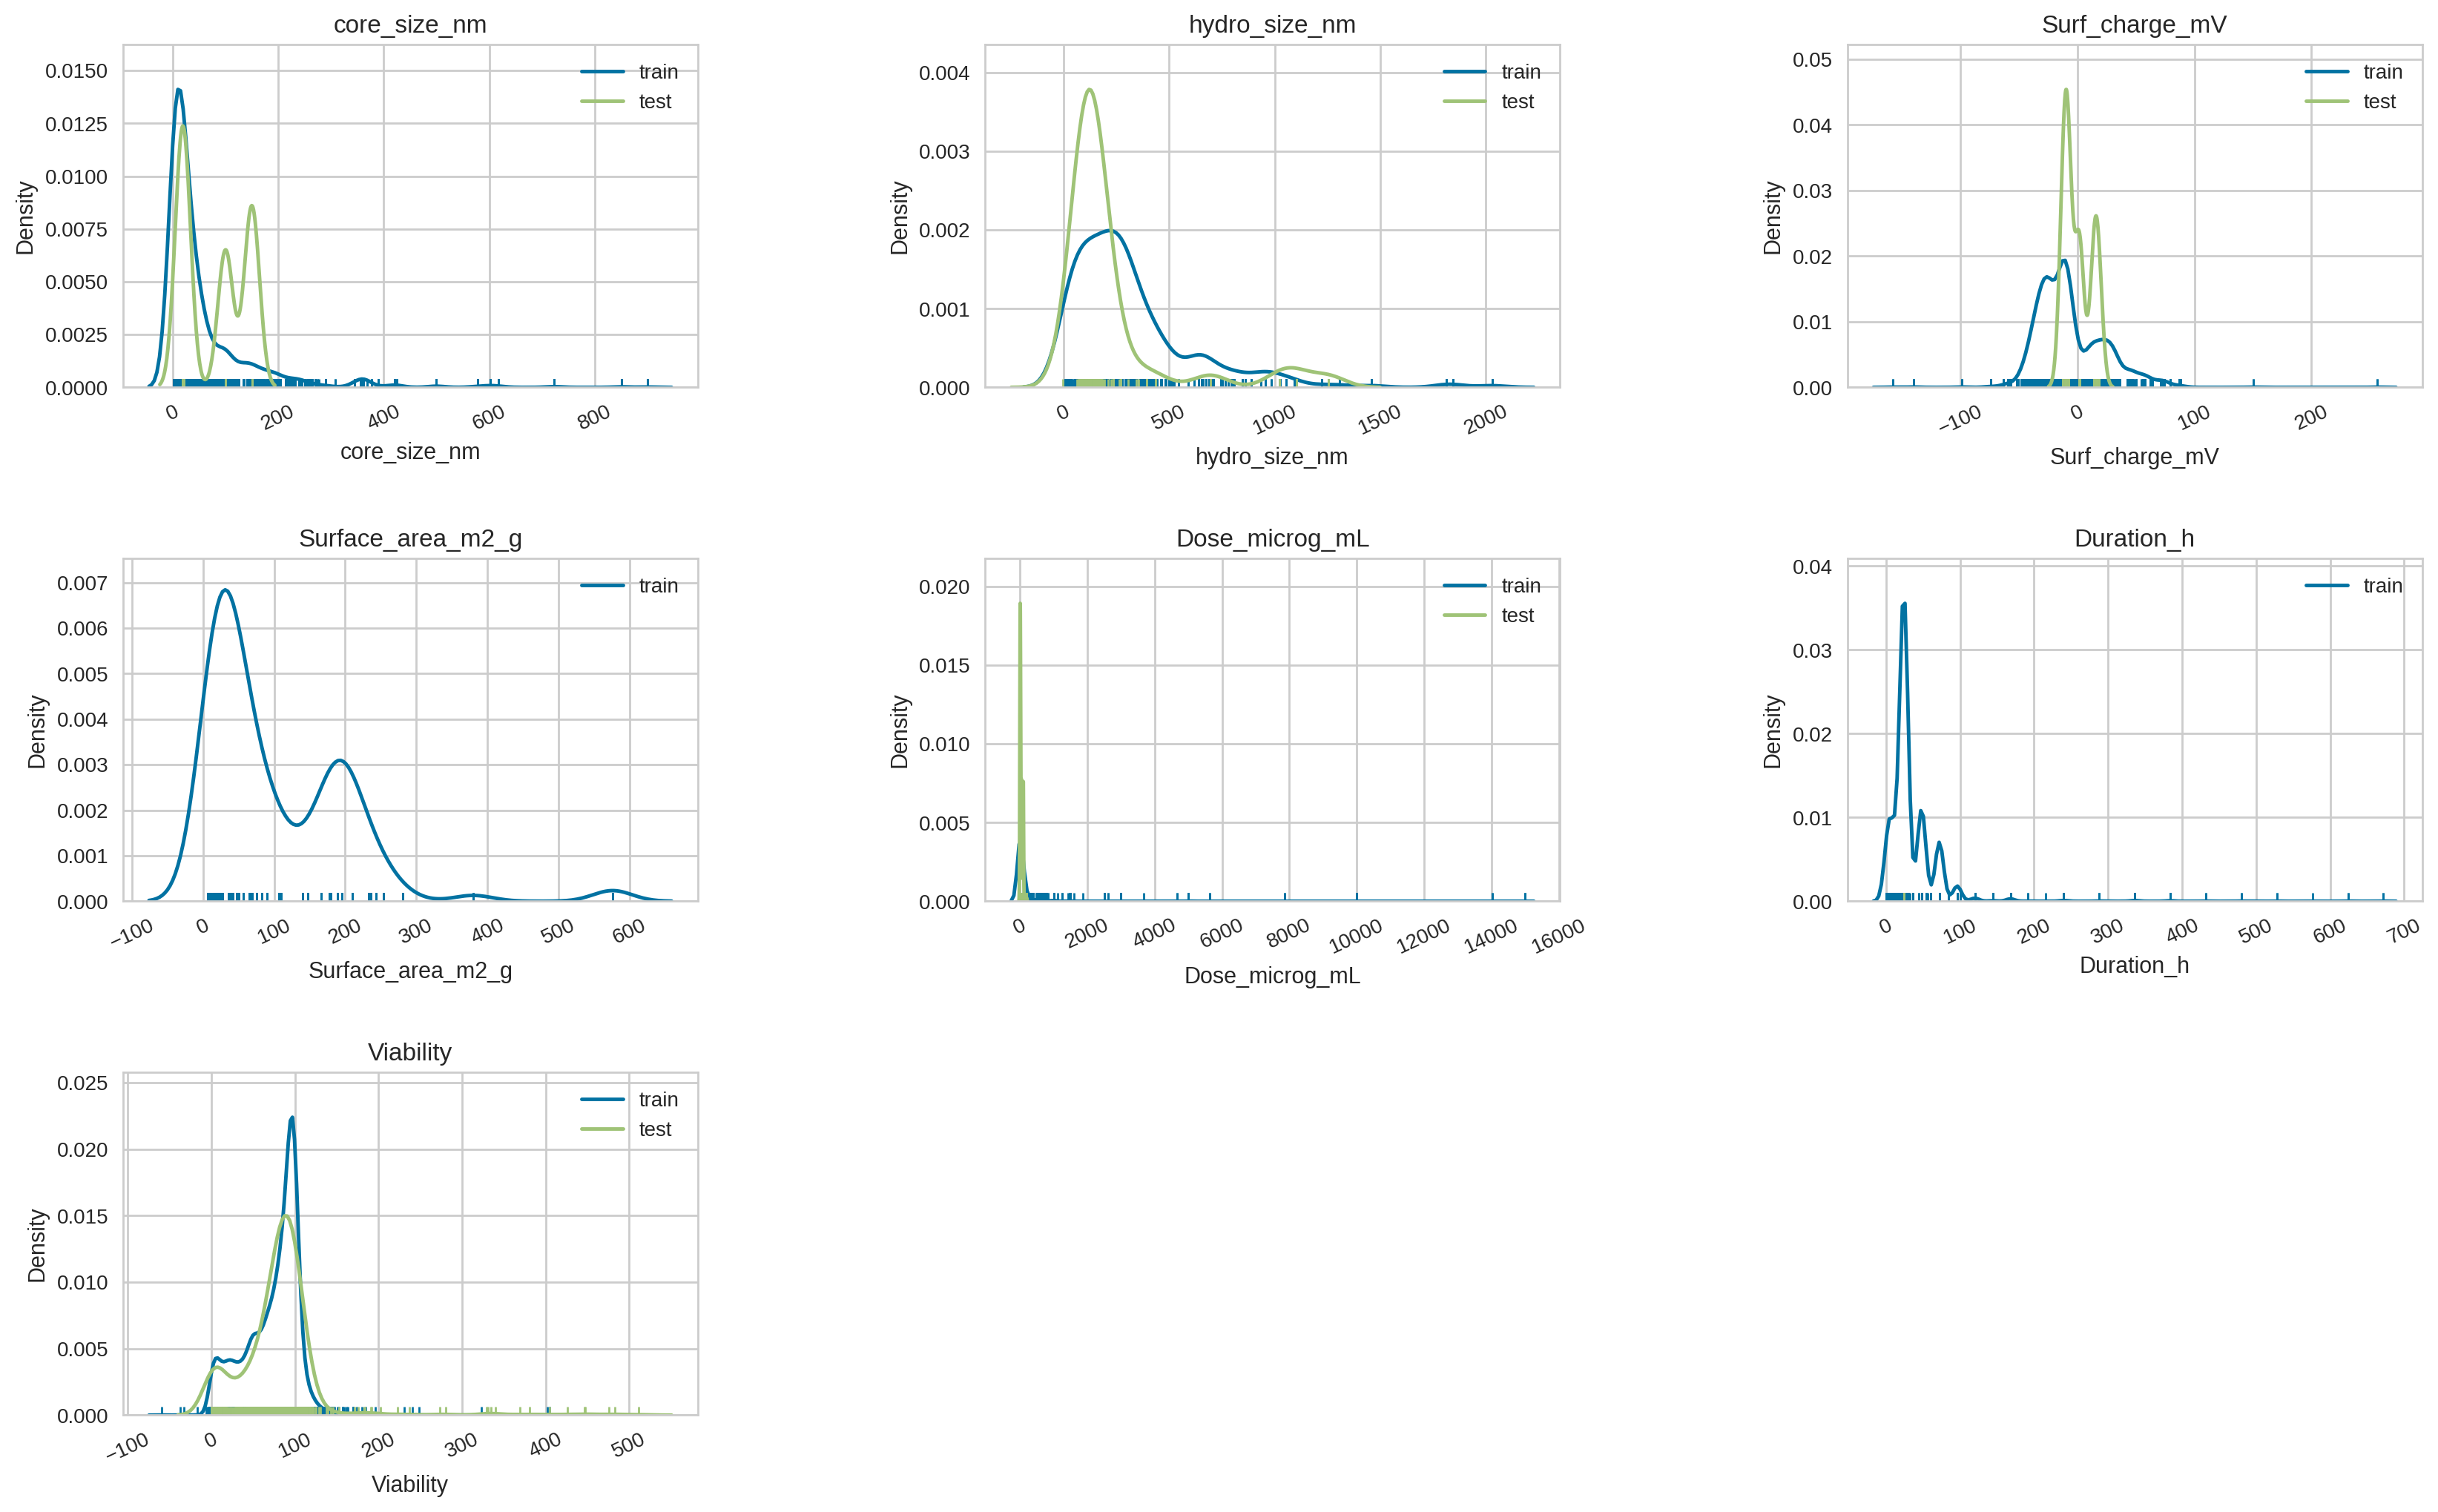

In [28]:
plot_distribution_train_test(data_train_df, data_asina_test_df)

In [29]:
for i in data_train_df.columns:
    print(i)
    unique_train = len(set(data_train_df[i].tolist()))
    unique_test = len(set(data_test_df[i].tolist()))
    unique_intersect = len(set(data_train_df[i].tolist()).intersection(set(data_test_df[i].tolist())))
    print(str(unique_train) + " - " + str(unique_test) + " - " + str(unique_intersect))

NP_type
79 - 73 - 73
Coating
149 - 88 - 86
core_size_nm
1088 - 524 - 345
hydro_size_nm
7000 - 1883 - 170
Surf_charge_mV
5104 - 1472 - 266
Surface_area_m2_g
8427 - 2138 - 45
shape
14 - 12 - 12
Dose_microg_mL
579 - 296 - 212
Duration_h
334 - 88 - 30
Cell_name
277 - 205 - 197
Cell_species
21 - 18 - 17
cell_Organ
64 - 58 - 57
Cell_morphology
38 - 32 - 32
Cell_age
6 - 6 - 6
cell_type
3 - 3 - 3
sex
3 - 3 - 3
Assay
34 - 34 - 34
Test_indicator
18 - 18 - 18
nanomaterial_group
5 - 5 - 5
Viability
4920 - 1755 - 985


### Prepare classification dataframes

In [15]:
data_classification_asina_test_df = f.convert_to_classification_dataset(data_asina_test_df.copy())

In [16]:
data_classification_asina_test_df.shape

(969, 20)

# PyCaret

### Load the universal regression model

### predict ASINA test set